Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0001   1.289124e+02   1.215527e+02 
    00s05  0009   4.786455e+01   1.463575e+03 
    00s12  0022  -1.496246e+02   3.564104e+02 
    00s15  0028  -1.531119e+02   7.400344e-06 
    00s16  0030  -1.531119e+02   1.103146e-07 
Runtime:     00s16
Optimization status: Converged

Optimization restart 1/20, f = -153.111921383
Optimization restart 2/20, f = -153.111921379
Optimization restart 3/20, f = -153.111921383
Optimization restart 4/20, f = -153.111921383
Optimization restart 5/20, f = -153.111921383
Optimization restart 6/20, f = -153.111921383
Optimization restart 7/20, f = -153.111921374
Optimization restart 8/20, f = -153.111921383
Optimization restart 9/20, f = -153.111921383
Optimization restart 10/20, f = -153.111921383
Optimization restart 11/20, f = -153.111921383
Optimization restart 12/20, f = -153.111921383
Optimization restart 13/20, f = -153.111921383
Optimization restart

GP_regression.,value,constraints,priors
rbf.variance,0.43704286102526857,+ve,
rbf.lengthscale,0.9008903023325976,+ve,
Gaussian_noise.variance,9.548657211765261e-05,+ve,


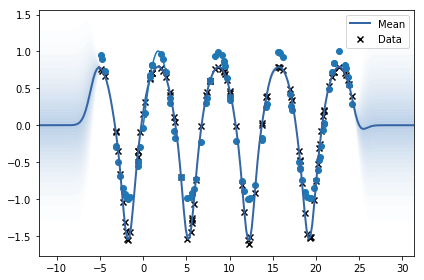

In [6]:
# Gaussian Process - for Coarse-Grain Potential Development
# Berkeley National Lab, Summer 2018
# University of Saint Mary

import numpy as np
from matplotlib import pyplot as plt
import GPy
from IPython.display import display

d = 1 #input dimension
var = 1 #variance
theta = 5 # length-scale

InFileName = 'BiomolecularData.txt' # Any data file that you want to test (Data has to be a two column vector!!)
f = open(InFileName, 'r')
N = len(f.readlines())  # number of observed points.
f.close()

X = np.zeros(shape=(N,1))
Yo = np.zeros(shape=(N,1))

#------------------------------------
# Open the file and read data points from the file

InFile = open(InFileName,'r')
LineNumber = 0
for Line in InFile:
    #Remove the lin-ending characters
    Line = Line.strip('\n')
    row = Line.split()
    #Index the counter used to keep track of line number
    X[LineNumber] = float(row[0])
    Yo[LineNumber] = float(row[1])
    LineNumber += 1
#After the loop is completed., close the file
InFile.close()
# -----------------------------------

X_min = np.ndarray.min(X)          # The minimum value of matrix X
Yo_min = np.ndarray.min(Yo) * 1.2  # Make 20% larger on the min value
Y = np.log(Yo - Yo_min)            # log the original y-value minus minimum y-value


kernel = GPy.kern.RBF(d, var, theta)
# Radial Basis Function kernel, aka squared-exponential, exponentiated quadratic or Gaussian kernel 
# k(r)=σ2exp(−12r2)



m = GPy.models.GPRegression(X,Y,kernel)    # Regular Gaussian Processes with Regression

#m = GPy.models.SparseGPRegression(X,Y,kernel) # Regular Sparse Gaussian Processes with Regression (Good for a big data file)
#fig = m.plot()
#GPy.plotting.show(fig, filename='basic_gp_regression_notebook')
#display(m)

# Optimiztion 
m.optimize(messages=True)
m.optimize_restarts(num_restarts = 20)

#fig = m.plot()
#GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')
#display(m)

fig = m.plot(plot_density=True)
GPy.plotting.show(fig, filename='basic_gp_regression_density_notebook_optimized')
display(m)

m.predict(m.X)

#Xp = np.arange(X_min,2.5,0.002).reshape(-1,1)
Xp = np.arange(0,2.5,0.002).reshape(-1,1)
Yt = m.predict(Xp)
Yp = np.exp(Yt) + (Yo_min)

#plt.axis([0, 1.5, -3, 15])
plt.scatter(X,Yo)
plt.plot(Xp,Yp[0])
plt.show()

# Out file for the CGPotential data.
Dataout = np.column_stack((Xp,Yp[0]))
np.savetxt('CGPotential.dat',(Dataout),fmt=('%10.5f', '%12.6f'))